In [1]:

try:
    import requests
except:
    print("If you read this message, it means you need to install the package requests by using pip3 install requests --user")
import numpy as np
import json
import matplotlib.pyplot as plt
from IPython.display import Audio as play_wave
import getpass


# Get a token from Spotify
Nowadays Spotify web APIs only work with an authorization, which means, to have an available token. You can get a simple token by visiting the page [here](https://developer.spotify.com/console/get-audio-features-several-tracks/).
Click on "Get Token", login to Spotify, copy-paste the resulting string in the cell below and execute it.

In [3]:
#token="your token"
token= getpass.getpass("Please copy-paste your token here\n")
headers={"Authorization": "Bearer %s"%token}

Please copy-paste your token here
········


# Search with spotify
Now, let's first look the Spotify's API regarding the simple search. The documentation page is [here](https://developer.spotify.com/console/get-search-item/). We see we need to specify a parameter named "q" with the query string, and one named "type" specify either "track" or "artist".
So, let's start with the best song ever, i.e., "I love it" by Icona Pop.


In [4]:
params={"q": "I love it Icona Pop", "type": "track"}
url="https://api.spotify.com/v1/search"
req=requests.get(url=url, params=params,headers=headers)
assert req.status_code==200, req.content
answer=req.json()
items=answer["tracks"]["items"]
first_result=items[0]
print("First result")
print("Author: %s"%first_result["artists"][0]["name"])
print("Name: %s"%first_result["name"])
print("Preview url: %s"%first_result["preview_url"])
print("Id on spotify: %s"%first_result["id"])


First result
Author: Icona Pop
Name: I Love It (feat. Charli XCX)
Preview url: https://p.scdn.co/mp3-preview/35149f91f3f5689e5ea40adb1e518b852aee5f79?cid=774b29d4f13844c495f206cafdad9c86
Id on spotify: 2U8NXPTXZWG2O0ye2sYRiH


As you can see, Spotify returns A LOT of information, including a freely-downloadable 30-second preview url (be careful, Spotify knows who you are), and the ID. The ID is extremly important to get further information, especially the audio features! 

# Audio Features
One of the sexiest Spotify's APIs is the possibility to download automatically computed high-level audio features.

While we don't know how they were computed, we know what they mean and we can trust spotify on their quality. The APIs are documented [here](https://developer.spotify.com/console/get-audio-features-several-tracks/).

Let's now get some information on Icona Pop, since we know the id_  

In [71]:
modes=["minor", "major"]
key_tonal=["C","C#", "D","D#","E","F","F#","G","G#","A","A#","B"]

Before analyzing it with Spotify, let's try to make an educated guess, with respect to the preview URL. 

So, how much are these values?

Use the description [here](https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object)
- tempo (BPM)
- key and mode (any listener with perfect pitch?)
- danceability (how suitable a track is for dancing?)
- energy  (perceptual measure of intensity and activity)
- speechiness (presence of spoken words in a track)
- acousticness (whether the track iacoustic)
- liveness ( presence of an audience in the recording)
- instrumentalness (whether a track contains no vocals)
- valence (the musical positiveness conveyed by a track)

In [ ]:
url="https://api.spotify.com/v1/audio-features"
params={"ids":"2U8NXPTXZWG2O0ye2sYRiH"}
req=requests.get(url=url, params=params, headers=headers)
audio_features=req.json()["audio_features"][0]
print("The song has a duration of %.3f seconds, with %d BPM, and it is in %s %s"
      %(audio_features["duration_ms"]/1000, audio_features["tempo"], 
          key_tonal[audio_features["key"]], modes[audio_features["mode"]]))
for feature in ["danceability", "energy", "speechiness", 
                "acousticness","liveness","instrumentalness","valence"]:
    print("The %s of the song is %.1f %%"%(feature, 100*audio_features[feature]))



# Audio Analysis
We can get the audio analysis, which is a more complete analysis that includes even single beats and chords.

Audio Analysis is documented [here](https://developer.spotify.com/console/get-audio-analysis-track/)

For example, let's track the beat instants during the song


In [81]:
audio_analysis_url=audio_features["analysis_url"]
req=requests.get(url=audio_analysis_url, headers=headers)
#audio_features=req.json()["audio_features"][0]
beats=req.json()["beats"]

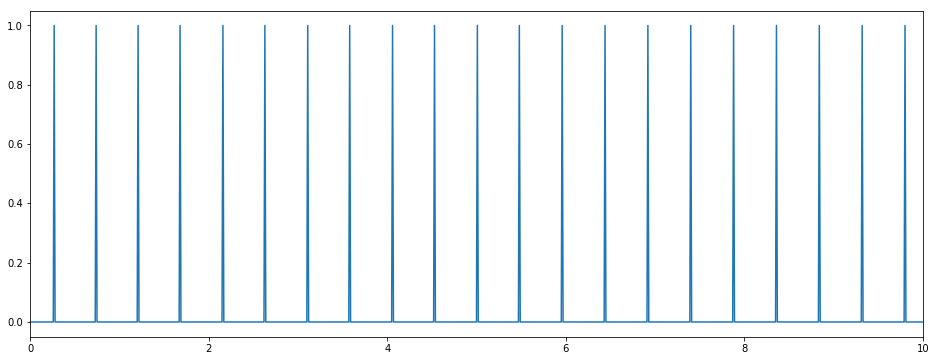

In [87]:
t=np.arange(0,audio_features["duration_ms"]/1000,0.01)
beat_array=np.zeros(t.shape)
for b in beats:
    beat_array[np.argmin(np.abs(t-b["start"]))]=1
plt.figure(figsize=(16,6))
plt.plot(t, beat_array)
plt.xlim([0,10])
plt.show()
